In [2]:
from ladybug.epw import EPW
import numpy as np
from ladybug.dt import DateTime, datetime
import pandas as pd
from ladybug.analysisperiod import AnalysisPeriod
from datetime import timezone, timedelta, tzinfo, timezone

# # load test data from a file
epw_file = (r"C:\Users\tgerrish\Documents\GitHub\target_dir\kvrrj\tests\assets\example.epw")
epw = EPW(epw_file)

# epw_file = r"C:\Users\tgerrish\OneDrive - Buro Happold\Weather files\epws\THA_KAM-PAENG-PHET_483800_IW2.epw"
# epw = EPW(epw_file)

# epw_file = r"C:\Users\tgerrish\OneDrive - Buro Happold\Weather files\epws\AUS_WA_Perth.Intl.AP.946100_TMYx.2004-2018.epw"
# epw = EPW(epw_file)


In [3]:
from kvrrj.solar import Solar, _lb_location_to_pvlib_location
from kvrrj.wind import Wind


# create solar object
solar = Solar.from_epw(epw_file)
wind = Wind.from_epw(epw_file)

# sol.plot_tilt_orientation_factor()

# create solar object from location and dates
# sol1 = Solar.from_openmeteo(location=sol.location, start_date=sol.start_date, end_date=sol.end_date)

# create from pvlib
# sol2 = Solar.from_pvlib(location=sol.location, start_date=sol.start_date, end_date=sol.end_date, cloud_cover=np.array(epw.total_sky_cover.values) / 10)


AttributeError: 'Wind' object has no attribute 'source'

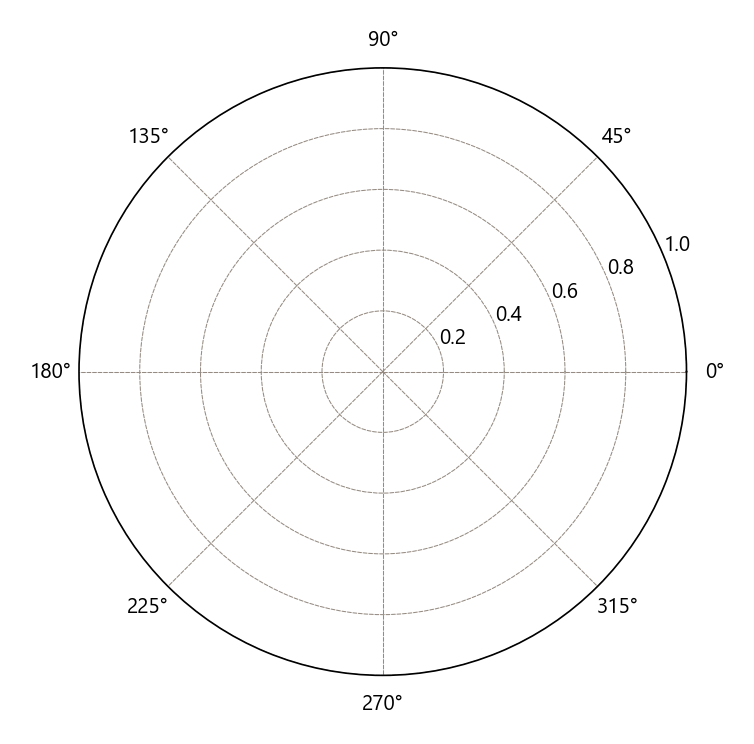

In [7]:
wind.plot_windrose()

<PolarAxes: title={'left': 'example.epw at 0°\nJan 01 to Dec 31 between 00:00 and 23:59 every hour'}>

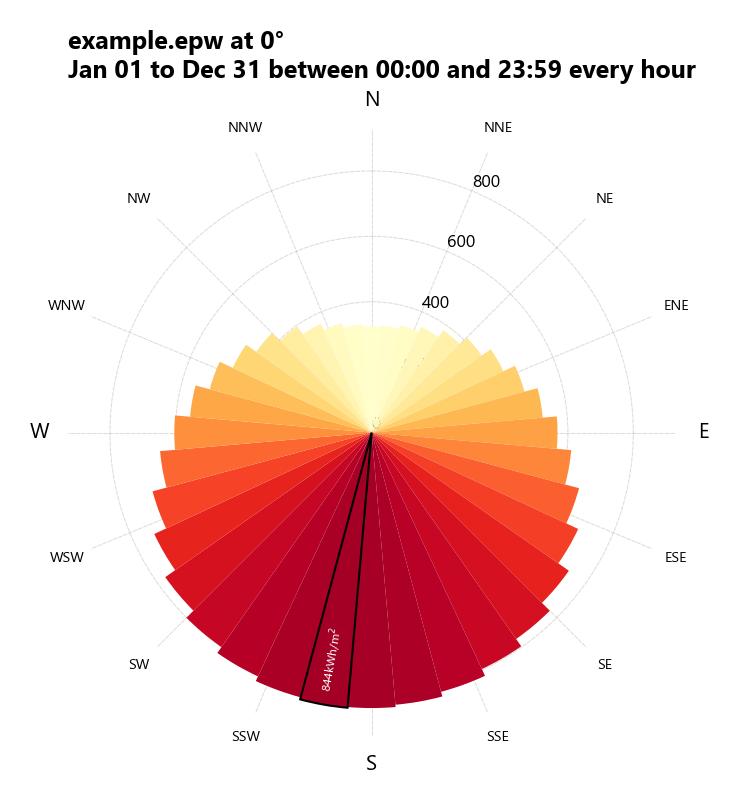

In [6]:
solar.plot_radiation_rose()

In [ ]:
from ladybug_geometry.geometry3d import Face3D, Plane, Point3D, Vector3D

sol.apply_shade_objects(shade_objects=[Face3D.from_regular_polygon(side_count=4, radius=1, base_plane=Plane(o=Point3D(0, 0, 2)))])

c:\Users\tgerrish\Documents\GitHub\target_dir\kvrrj\.venv\lib\site-packages\honeybee_radiance_command\options\rcontrib.py:75: UserWarning: rfluxmtx: aa will be set to 0 in rcontrib. there will be no ambient caching and the value for ar will be ignored.
  warnings.warn(warn)


In [42]:
from honeybee.model import Model, Room
from honeybee_radiance.sensorgrid import SensorGrid, Sensor

rm = Room.from_box(identifier="README.md23")


d = Model(identifier="awefiojn", rooms=[rm]).properties.energy
rm.properties.energy.construction_set.constructions

[Construction,
  Generic Exterior Wall,    !- name
  Generic Brick,            !- layer 1
  Generic LW Concrete,      !- layer 2
  Generic 50mm Insulation,  !- layer 3
  Generic Wall Air Gap,     !- layer 4
  Generic Gypsum Board;     !- layer 5,
 Construction,
  Generic Interior Wall,    !- name
  Generic Gypsum Board,     !- layer 1
  Generic Wall Air Gap,     !- layer 2
  Generic Gypsum Board;     !- layer 3,
 Construction,
  Generic Underground Wall, !- name
  Generic 50mm Insulation,  !- layer 1
  Generic HW Concrete,      !- layer 2
  Generic Wall Air Gap,     !- layer 3
  Generic Gypsum Board;     !- layer 4,
 Construction,
  Generic Exposed Floor,    !- name
  Generic Painted Metal,    !- layer 1
  Generic Ceiling Air Gap,  !- layer 2
  Generic 50mm Insulation,  !- layer 3
  Generic LW Concrete;      !- layer 4,
 Construction,
  Generic Interior Floor,   !- name
  Generic Acoustic Tile,    !- layer 1
  Generic Ceiling Air Gap,  !- layer 2
  Generic LW Concrete;      !- layer 3,

C:\Users\tgerrish\Documents\GitHub\target_dir\kvrrj\src\kvrrj\solar.py:1819: UserWarning: The radiation benefit plot is only implemented temporarily here until a proper heatmap method is linked to it.
  warnings.warn(


<Axes: >

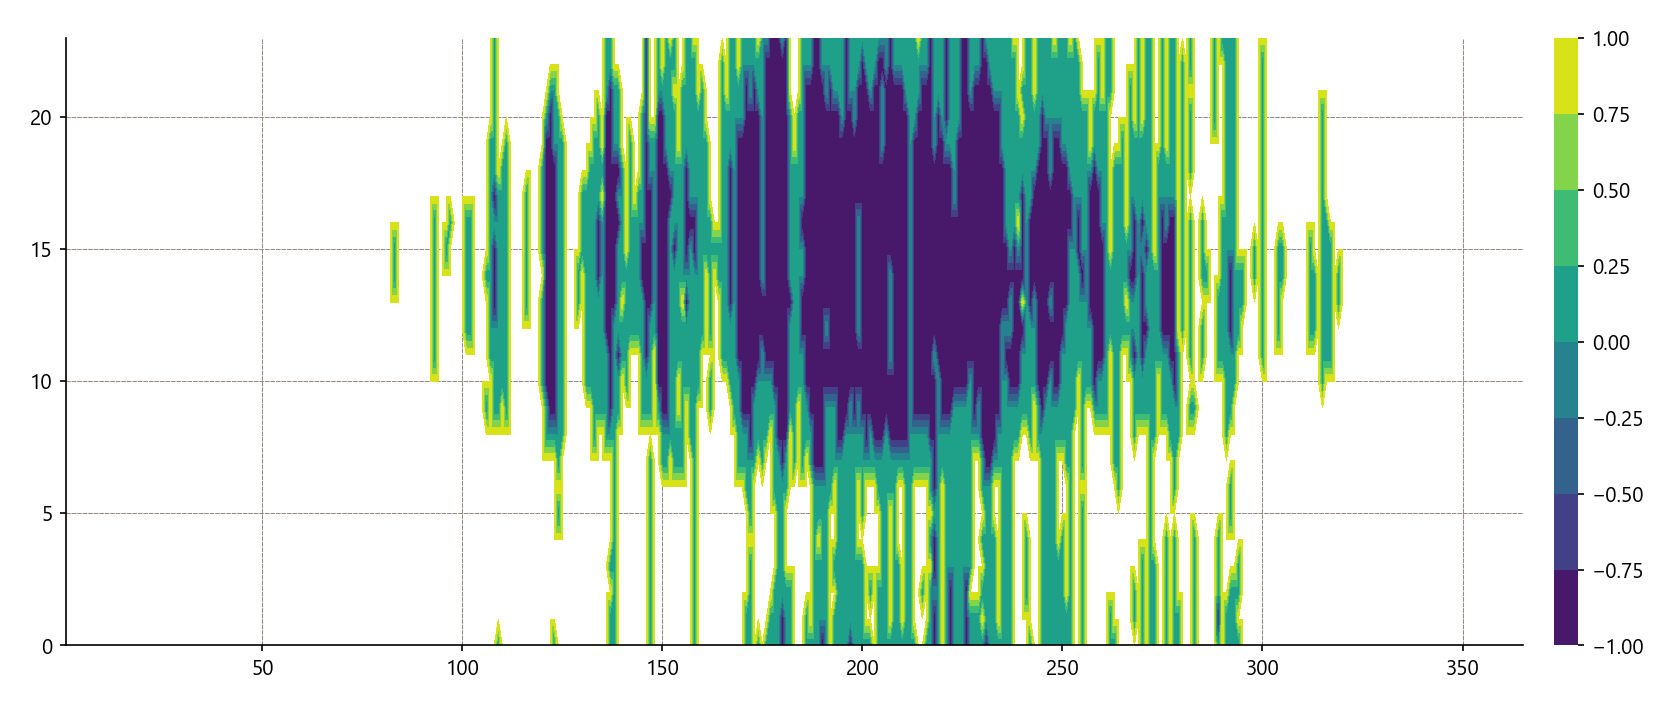

In [21]:
from kvrrj.viz.colormap import colormap_sequential


sol2.plot_radiation_benefit_heatmap(
    temperature=epw.dry_bulb_temperature,
    # levels=[-1, 0, 1],
    # extend="both"
)
# sol2._radiation_benefit_data(temperature=epw.dry_bulb_temperature).plot(levels=[-1, 0, 1])

<Axes: title={'left': 'pvlib-python at 51.15°, -0.18° (67% average cloud cover)\nJan 01 to Dec 31 between 09:00 and 11:59 every hour'}, xlabel='Orientation (clockwise from North at 0°)', ylabel='Tilt (0° facing the horizon, 90° facing the sky)'>

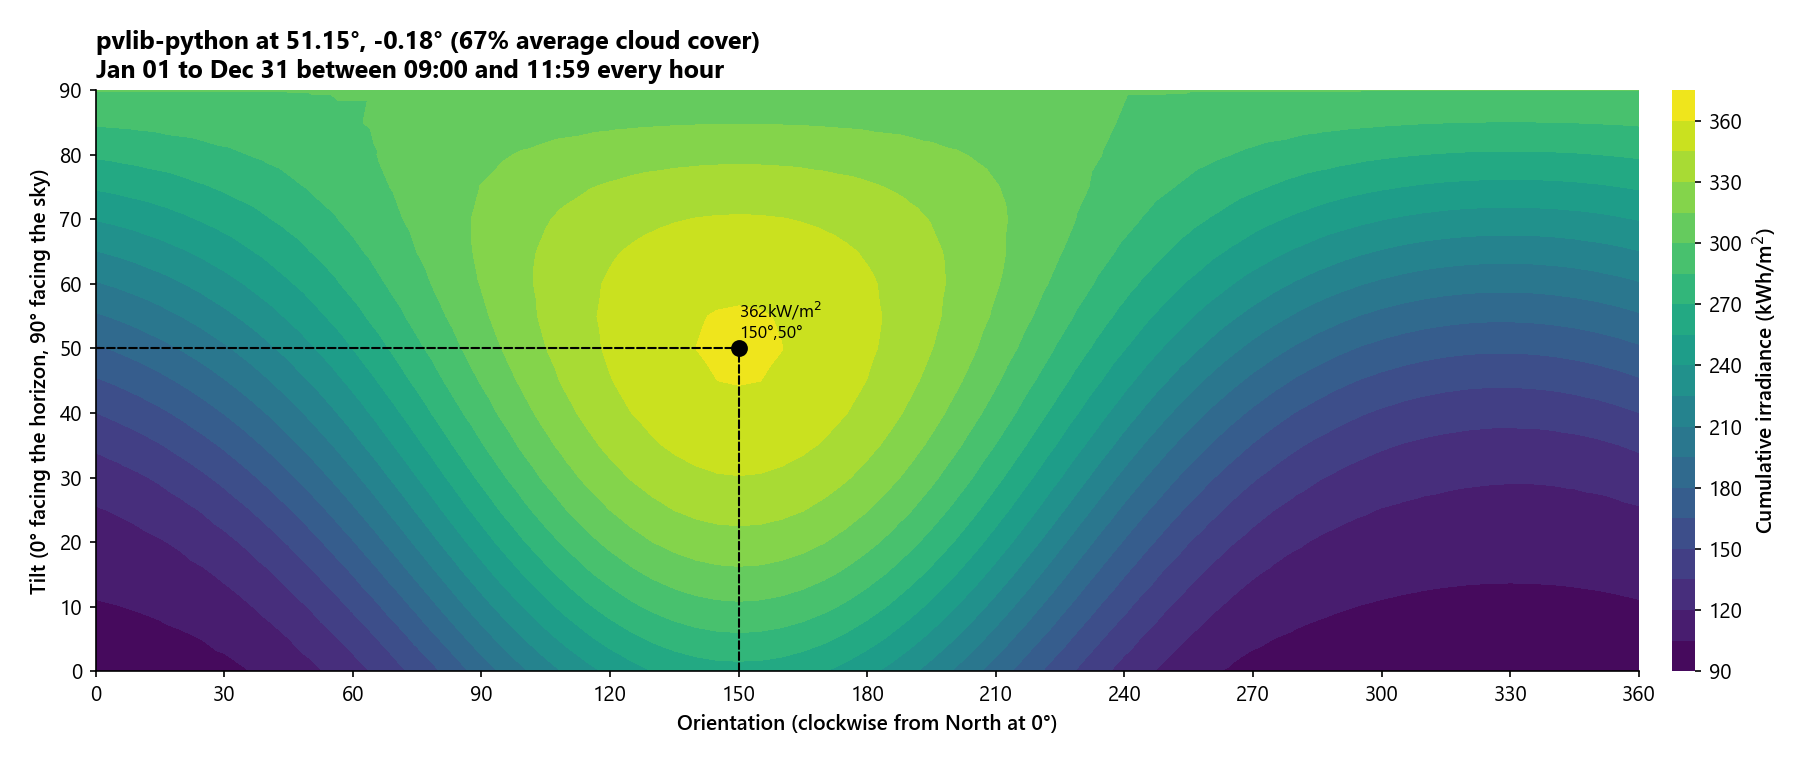

In [135]:
sol2.plot_tilt_orientation_factor(
    azimuth_count=36 * 2,
    altitude_count=9 * 2,
    levels=21,
    analysis_period=AnalysisPeriod(st_hour=9, end_hour=11),
)


<Axes: title={'left': 'pvlib-python at -31.94°, 115.967°\nJan 01 to Dec 31 between 00:00 and 23:59 every hour'}, xlabel='Orientation (clockwise from North at 0°)', ylabel='Tilt (0° facing the horizon, 90° facing the sky)'>

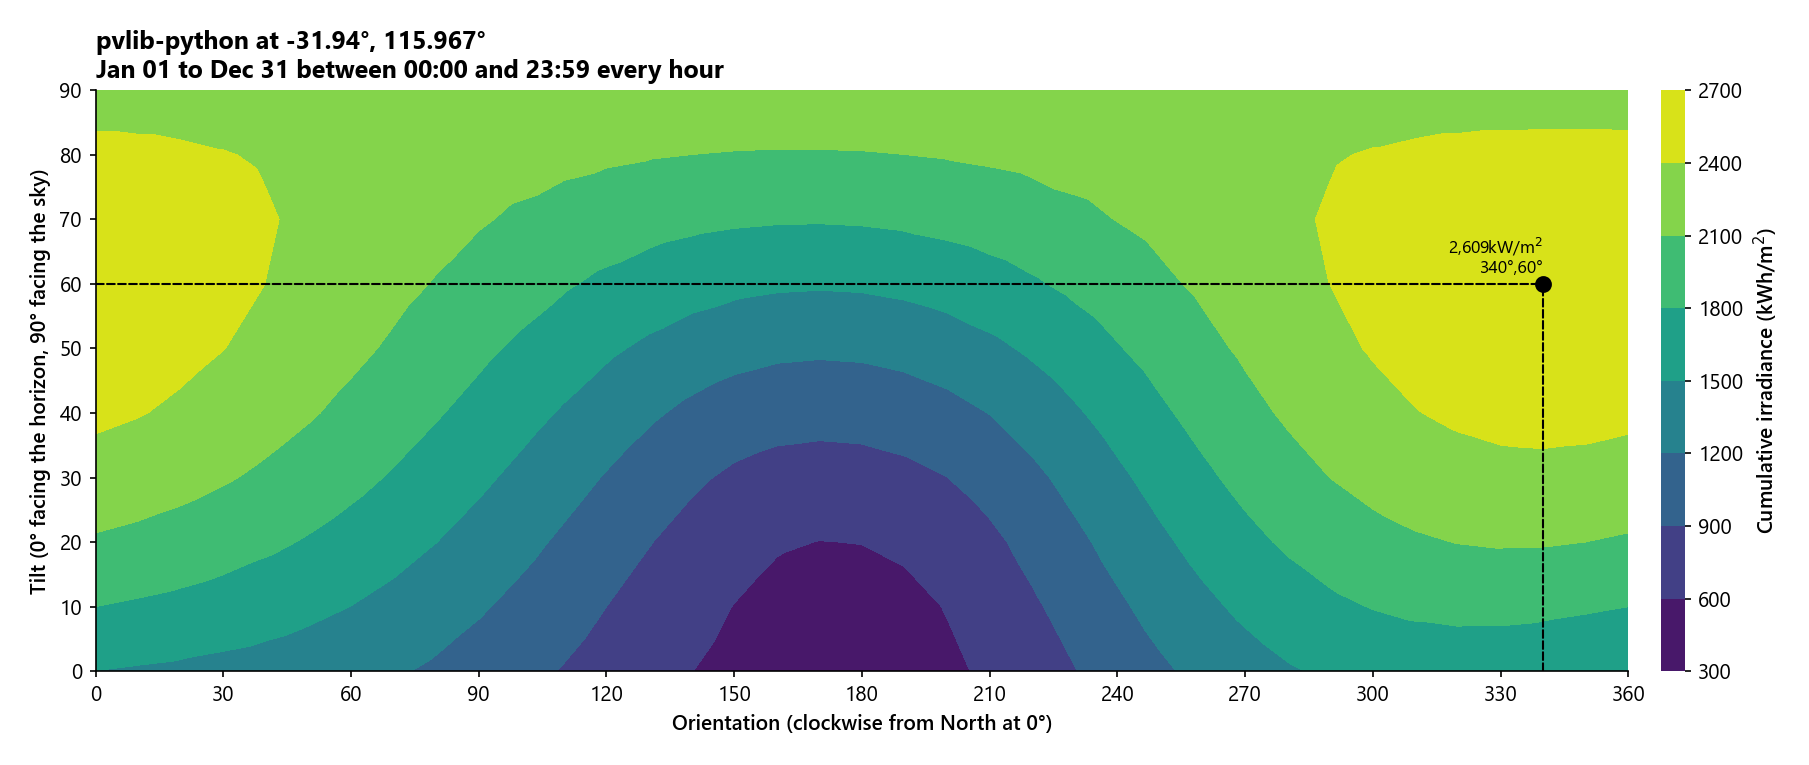

<Axes: >

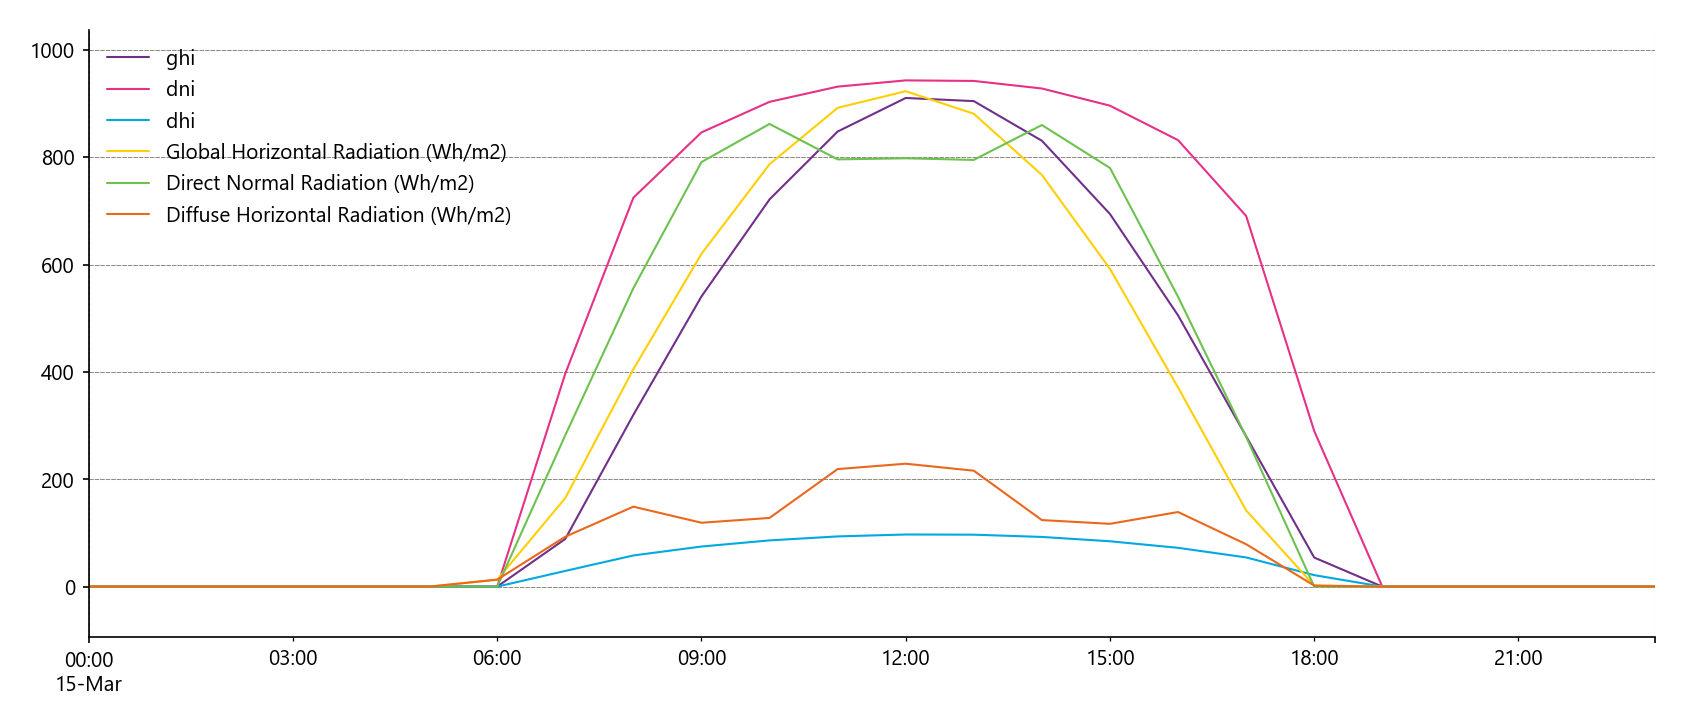

In [73]:
loc = _lb_location_to_pvlib_location(sol.location)
dts = sol.datetimeindex


pd.concat([loc.get_clearsky(dts), sol.global_horizontal_radiation_series, sol.direct_normal_radiation_series, sol.diffuse_horizontal_radiation_series], axis=1).loc["2017-03-15"].plot()


In [50]:
# use zhang_huang_solar_split to estimate rad from other variables - using epow as test for now

from ladybug.skymodel import zhang_huang_solar, zhang_huang_solar_split, disc
from ladybug.sunpath import Sunpath

# generate datetimes for the year
datetimes = [datetime(2017, 1, 1, 0, 0, 0) + timedelta(hours=i) for i in range(24*365)]
# create sun altitudes for each dateitme for the given location
sunpath = Sunpath.from_location(epw.location)
sun_altitudes = [
    sunpath.calculate_sun_from_date_time(dt).altitude for dt in datetimes
]
# get cloud cover
cc = epw.total_sky_cover.values
# get relative humidity
rh = epw.relative_humidity.values
# get dry bulb temperature
dbt = epw.dry_bulb_temperature.values
# get shifted dry bulb temperature
dbt_shifted = np.roll(epw.dry_bulb_temperature.values, -3).tolist()
# get wind speed
ws = epw.wind_speed.values
# get the doys
doys = [dt.timetuple().tm_yday for dt in datetimes]
# get the atmospheric pressure
atm_pressure = epw.atmospheric_station_pressure.values

# get the ghi values
ghi_zh = [zhang_huang_solar(alt=sun_altitudes[i], cloud_cover=cc[i], relative_humidity=rh[i], dry_bulb_present=dbt[i], dry_bulb_t3_hrs=dbt_shifted[i], wind_speed=ws[i]) for i in range(len(sun_altitudes))]
# get the dni, dhi values
dir_norm_rad = []
dif_horiz_rad = []
for i in range(len(ghi_zh)):
    dni, kt, am = disc(ghi_zh[i], sun_altitudes[i], doys[i], atm_pressure[i])
    dhi = ghi_zh[i] - (dni * np.sin(np.deg2rad(sun_altitudes[i])))
    dir_norm_rad.append(dni)
    dif_horiz_rad.append(dhi)

a = pd.DataFrame(index=datetimes, data={'ghi': ghi_zh, 'dni': dir_norm_rad, 'dhi': dif_horiz_rad})
b = pd.DataFrame(index=datetimes, data={'ghi_epw': epw.global_horizontal_radiation.values, 'dni_epw': epw.direct_normal_radiation.values, 'dhi_epw': epw.diffuse_horizontal_radiation.values})
pd.concat([a, b], axis=1).loc["2017-03-15"].sum()

ghi        4592.840944
dni        3392.681721
dhi        2948.131158
ghi_epw    6560.000000
dni_epw    7339.000000
dhi_epw    1627.000000
dtype: float64

In [53]:
# get data from openmeteo, and determine which of the variables are the right oines to use
csv_file = r"C:\Users\tgerrish\Downloads\open-meteo-31.95S115.81E23m (2).csv"

aa = pd.read_csv(csv_file, skiprows=2, index_col=0, parse_dates=True)





# add epw rad values
aa["epw ghi"] = epw.global_horizontal_radiation.values
aa["epw dni"] = epw.direct_normal_radiation.values
aa["epw dhi"] = epw.diffuse_horizontal_radiation.values
aa["year"] = epw.years.values

# get sunrise and set times and see how they compare each day

bb = aa[aa.year == 2007].iloc[:, :-1]
#determine the datasets which most closely match
bb.corr()

,direct_normal_irradiance (W/m²),shortwave_radiation (W/m²),diffuse_radiation (W/m²),direct_radiation (W/m²),epw ghi,epw dni,epw dhi
direct_normal_irradiance (W/m²),1.000000,0.945984,0.719194,0.953460,0.853922,0.811278,0.709644
shortwave_radiation (W/m²),0.945984,1.000000,0.834784,0.983183,0.896174,0.798012,0.788887
diffuse_radiation (W/m²),0.719194,0.834784,1.000000,0.720198,0.767308,0.595112,0.863569
direct_radiation (W/m²),0.953460,0.983183,0.720198,1.000000,0.874736,0.808160,0.707617
epw ghi,0.853922,0.896174,0.767308,0.874736,1.000000,0.935368,0.793180
epw dni,0.811278,0.798012,0.595112,0.808160,0.935368,1.000000,0.567029
epw dhi,0.709644,0.788887,0.863569,0.707617,0.793180,0.567029,1.000000


<Axes: >

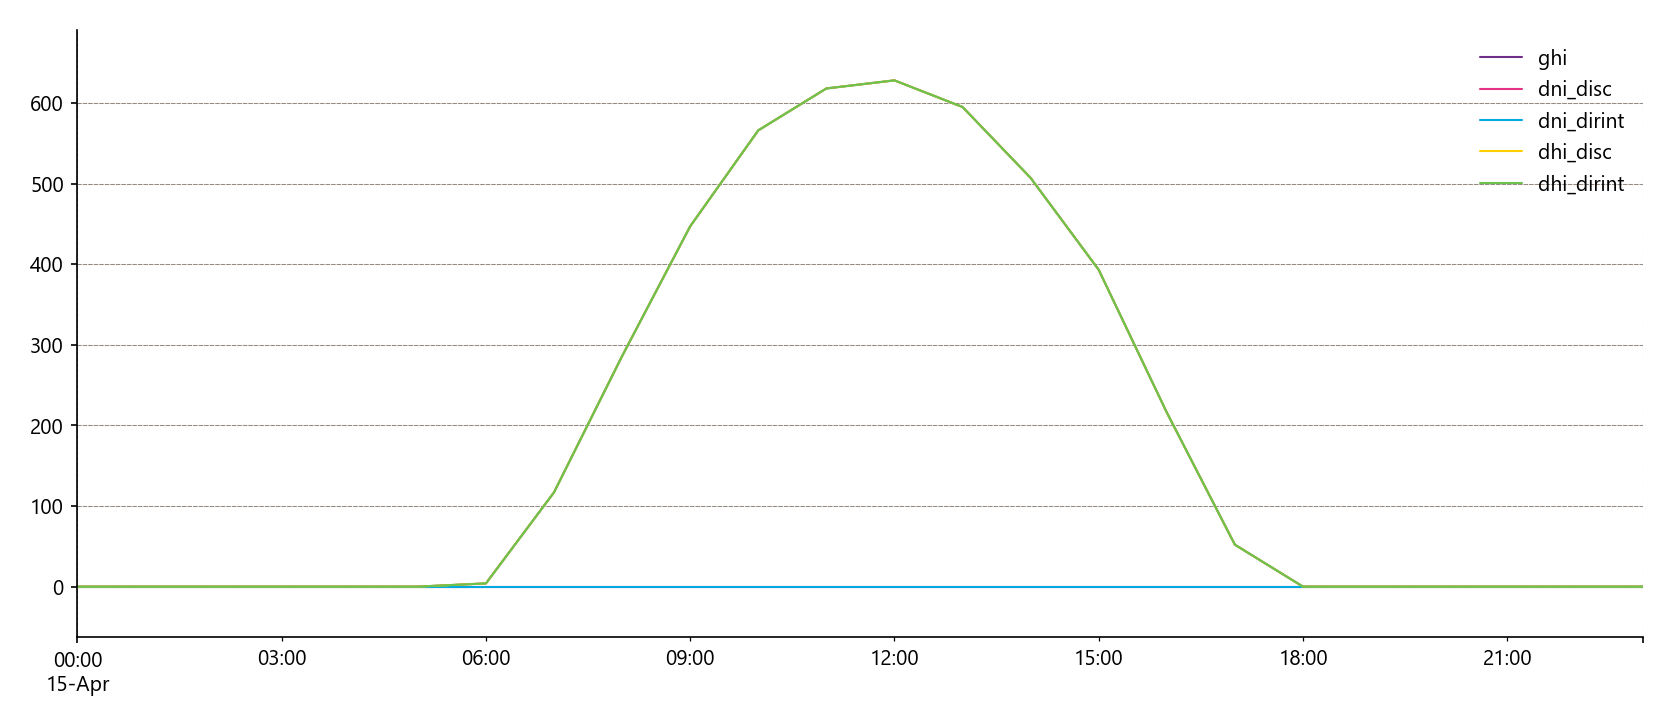

In [15]:
from kvrrj.solar import split_ghi_into_dni_dhi, Solar


# sol = Solar.from_epw(epw_file)


ghi, dni_disc, dni_dirint, dhi_disc, dhi_dirint = split_ghi_into_dni_dhi(ghi=sol.global_horizontal_radiation, datetimes=sol.datetimes, location=sol.location, pressures=epw.atmospheric_station_pressure.values)


df = pd.DataFrame(index=sol.datetimes)
df['ghi'] = ghi
df['dni_disc'] = dni_disc
df['dni_dirint'] = dni_dirint
df['dhi_disc'] = dhi_disc
df['dhi_dirint'] = dhi_dirint
df.loc["2017-04-15"].plot()

In [33]:
from kvrrj.ladybug.analysisperiod import _iterable_datetimes_to_lb_analysis_period
from kvrrj.solar import *

# sol = Solar(
#     location=Location(time_zone=0),
#     datetimes=pd.to_datetime(epw.dry_bulb_temperature.header.analysis_period.datetimes)
#     .to_pydatetime(),
#     direct_normal_radiation=[67.5556] * 8760,
#     diffuse_horizontal_radiation=[1] * 8760,
#     global_horizontal_radiation=[1] * 8760,
# )

sol = Solar.from_epw(epw_file)
sol_om = Solar.from_openmeteo(location=epw.location, start_date="1991-01-01", end_date="1992-03-04")
# sol._diffuse_horizontal_radiation_series.plot()
# sol.df
# sol.lb_datetimes
# sol.lb_dates
# sol.df.iloc[-48:].plot()

# rr = sol.radiation_rose(smx, direction_count=8)


kvrrj[console] - INFO - Loading data from solar_-31.93_115.97_19910101_19920304.json


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Axes: >

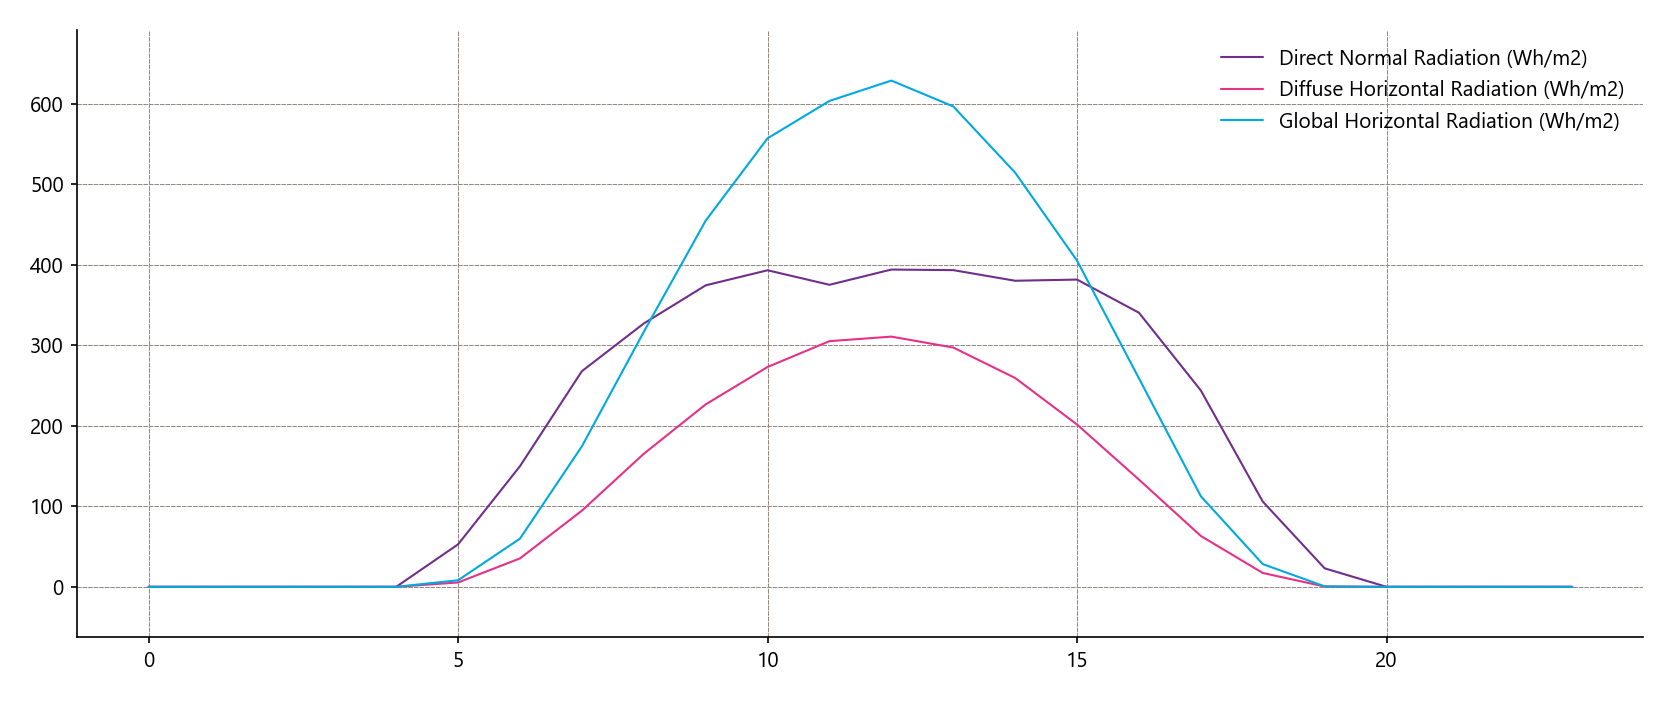

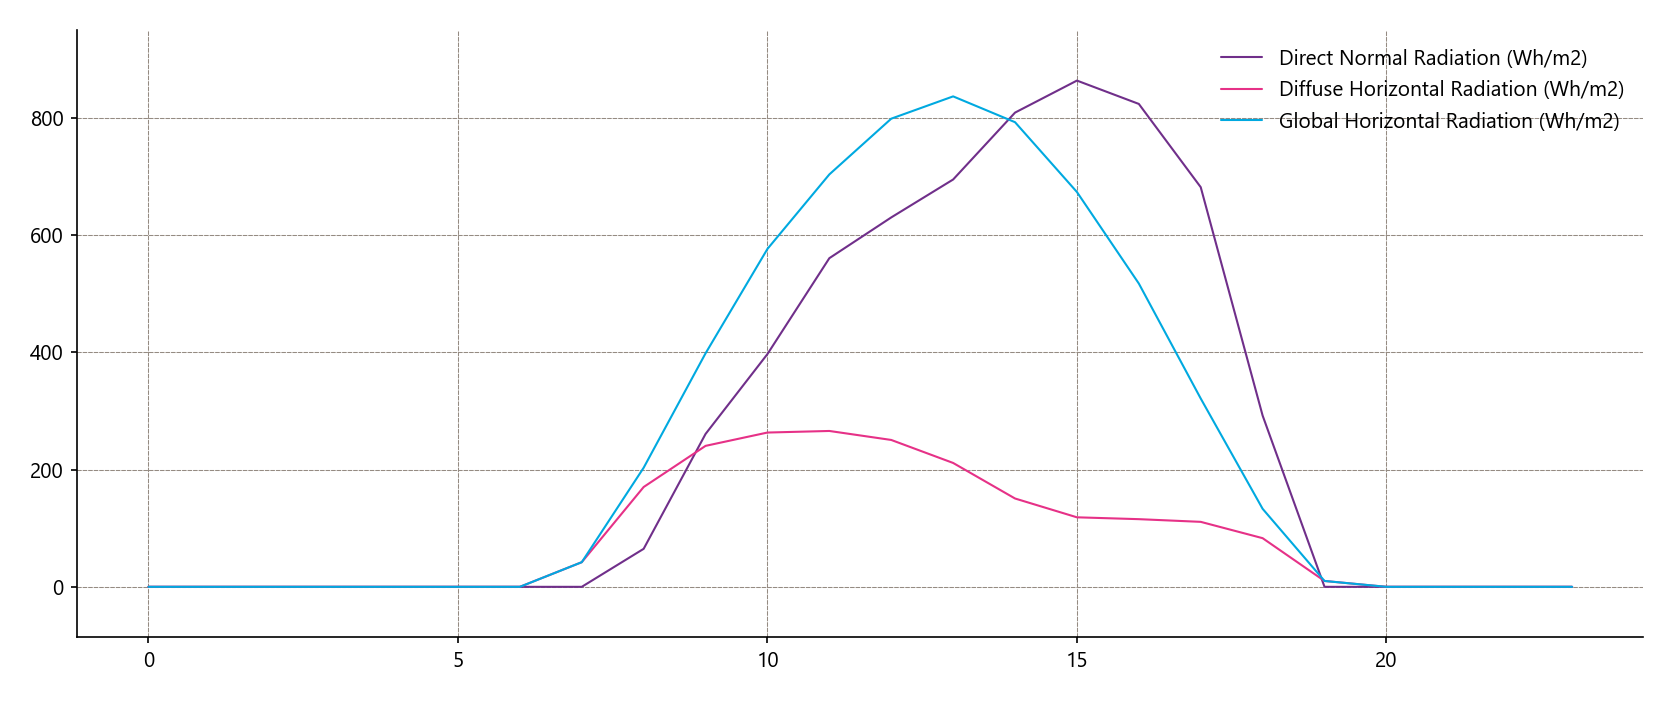

In [ ]:
sol.df.groupby(sol.datetimeindex.hour).mean().plot()
sol_om.df.groupby(sol_om.datetimeindex.hour).median().plot()

<Axes: title={'left': 'AUS_PERTH-AP_946100_IW2.epw\nJan 01 to Dec 31 between 00:00 and 23:59 every hour'}, xlabel='Orientation (clockwise from North at 0°)', ylabel='Tilt (0° facing the horizon, 90° facing the sky)'>

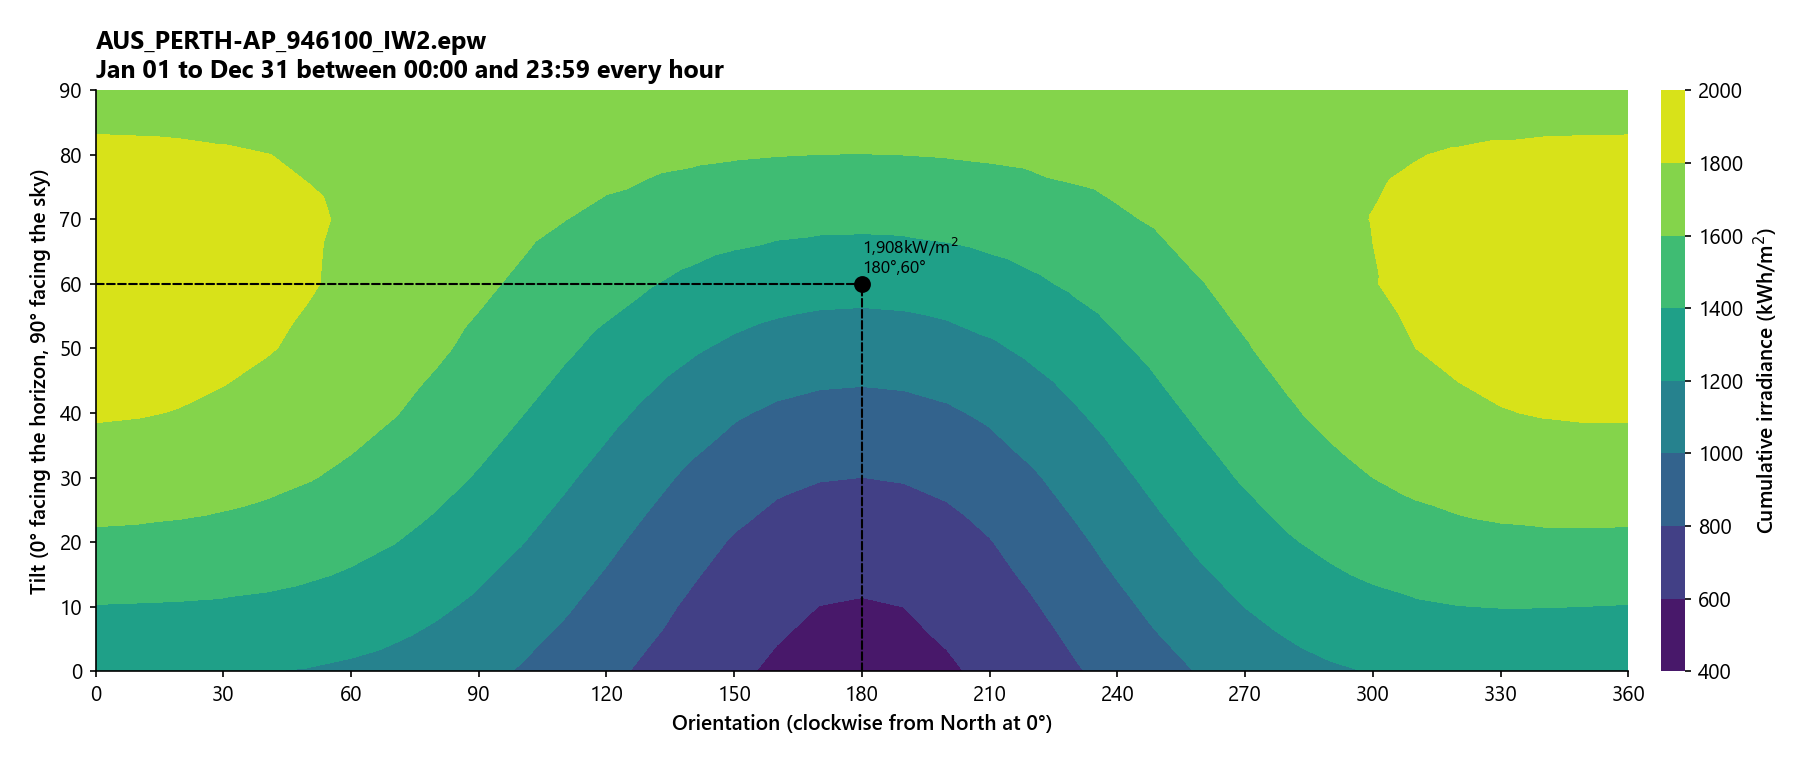

In [24]:
sol.plot_tilt_orientation_factor(irradiance_type=RadiationType.TOTAL)


<Axes: title={'left': 'OpenMeteo ERA5 at -31.93°, 115.97°\nJan 01 to Dec 31 between 00:00 and 23:59 every hour'}, xlabel='Orientation (clockwise from North at 0°)', ylabel='Tilt (0° facing the horizon, 90° facing the sky)'>

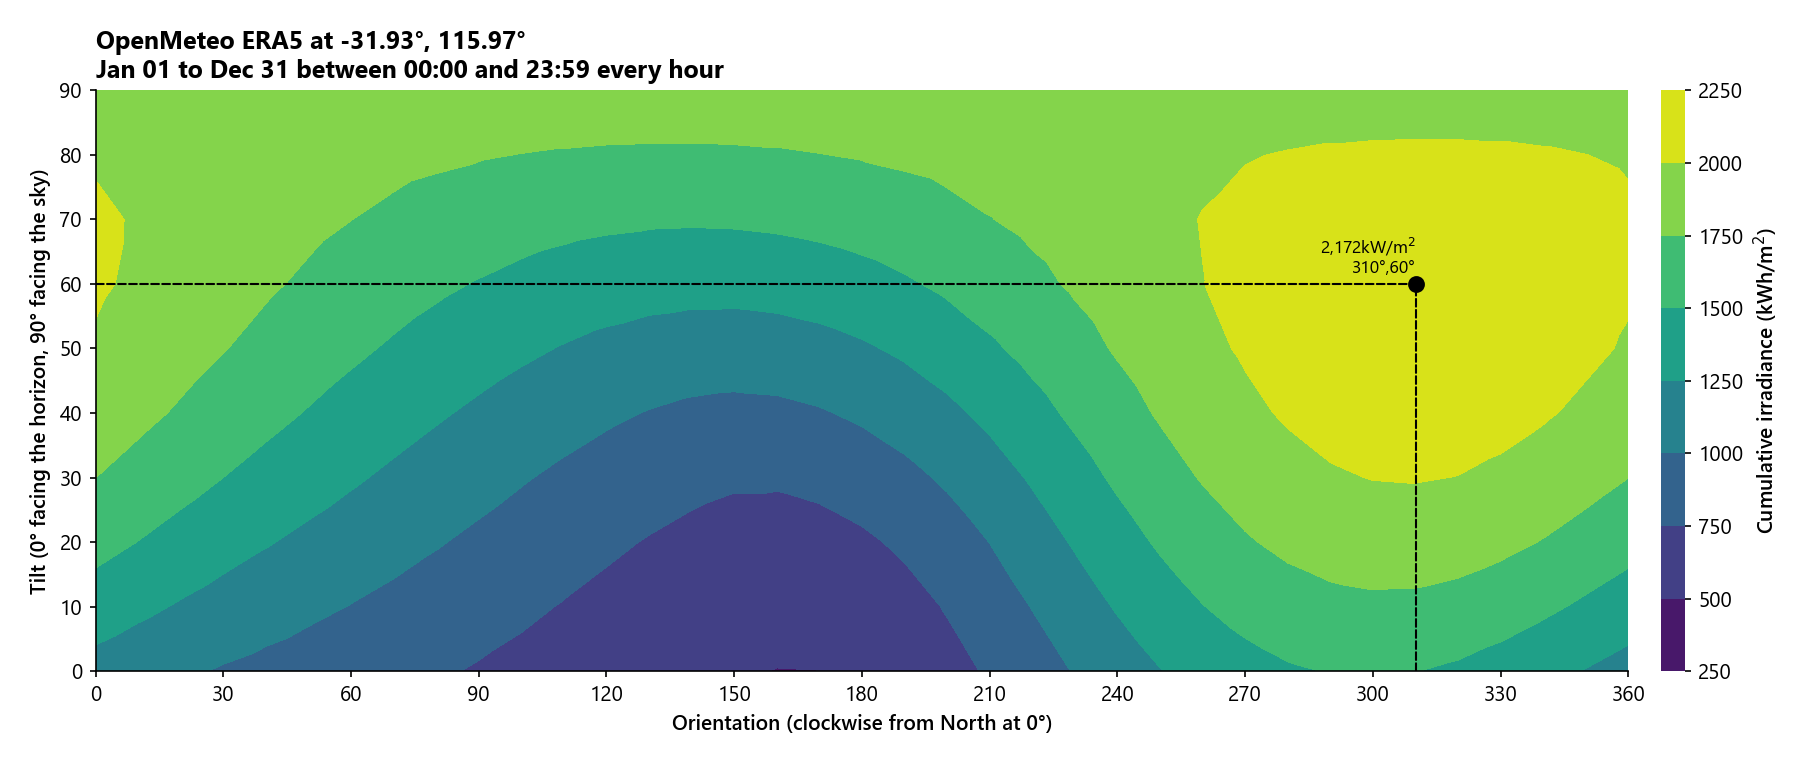

In [25]:
sol_om.plot_tilt_orientation_factor(irradiance_type=RadiationType.TOTAL)


<PolarAxes: title={'left': 'AUS_PERTH-AP_946100_IW2.epw at 0°\nJan 01 to Dec 31 between 00:00 and 23:59 every hour'}>

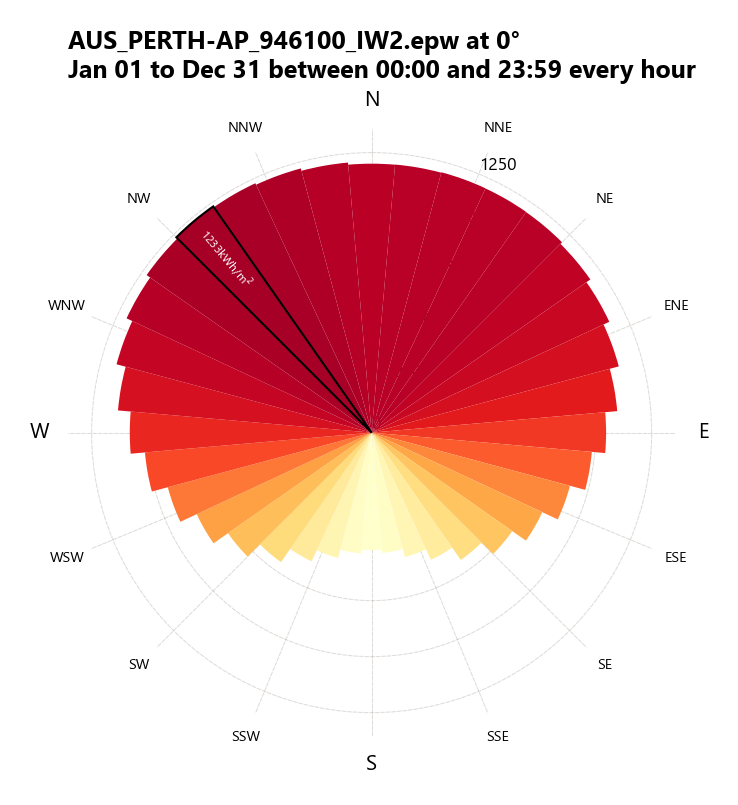

In [460]:
# smx = sol.sky_matrix()
# rr = sol.radiation_rose(smx, direction_count=8)
# rr

# sol
sol.plot_radiation_rose(directions=36)
# rr.direct_values

<PolarAxes: title={'left': 'AUS_PERTH-AP_946100_IW2.epw at 0°\nJan 01 to Dec 31 between 00:00 and 23:59 every hour'}>

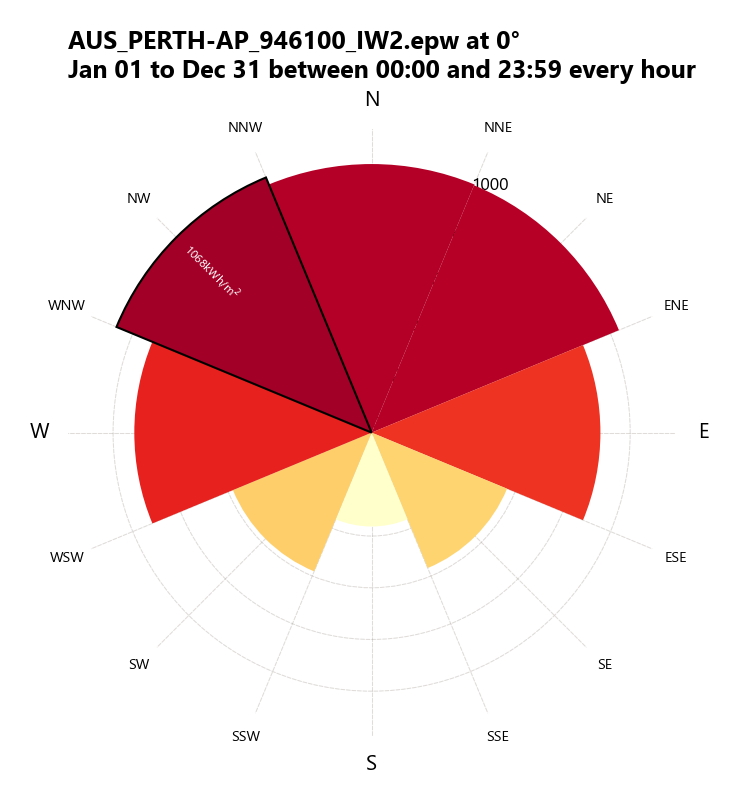

In [ ]:
# rr.direct_values
# smx_og = SkyMatrix.from_epw(epw_file, high_density=True)
# rr_og = RadiationRose(smx_og, direction_count=8)

# rr.direct_values, rr_og.direct_values

x=pd.concat([
    sol.global_horizontal_radiation_series,
    sol.suns_df], axis=1)

# x.groupby([
#     x.index.hour
# ]).mean().plot()

sol.plot_radiation_rose(directions=8, tilt_angle=0)

In [369]:
import json

import pytz

with open(
    r"C:\Users\tgerrish\simulation\_lbt_tk_openmeteo\solar_16.48_99.53_20160101_20170304.json"
) as f:
    data = json.load(f)

sr = data["hourly"]["shortwave_radiation"]
pr = data["hourly"]["surface_pressure"]
datetimes = (
    pd.to_datetime(data["hourly"]["time"])
    .tz_localize(pytz.FixedOffset(data["utc_offset_seconds"] / 60))
    .to_pydatetime()
    .tolist()
)
datetimes

[datetime.datetime(2016, 1, 1, 0, 0, tzinfo=pytz.FixedOffset(420)),
 datetime.datetime(2016, 1, 1, 1, 0, tzinfo=pytz.FixedOffset(420)),
 datetime.datetime(2016, 1, 1, 2, 0, tzinfo=pytz.FixedOffset(420)),
 datetime.datetime(2016, 1, 1, 3, 0, tzinfo=pytz.FixedOffset(420)),
 datetime.datetime(2016, 1, 1, 4, 0, tzinfo=pytz.FixedOffset(420)),
 datetime.datetime(2016, 1, 1, 5, 0, tzinfo=pytz.FixedOffset(420)),
 datetime.datetime(2016, 1, 1, 6, 0, tzinfo=pytz.FixedOffset(420)),
 datetime.datetime(2016, 1, 1, 7, 0, tzinfo=pytz.FixedOffset(420)),
 datetime.datetime(2016, 1, 1, 8, 0, tzinfo=pytz.FixedOffset(420)),
 datetime.datetime(2016, 1, 1, 9, 0, tzinfo=pytz.FixedOffset(420)),
 datetime.datetime(2016, 1, 1, 10, 0, tzinfo=pytz.FixedOffset(420)),
 datetime.datetime(2016, 1, 1, 11, 0, tzinfo=pytz.FixedOffset(420)),
 datetime.datetime(2016, 1, 1, 12, 0, tzinfo=pytz.FixedOffset(420)),
 datetime.datetime(2016, 1, 1, 13, 0, tzinfo=pytz.FixedOffset(420)),
 datetime.datetime(2016, 1, 1, 14, 0, tzinfo

In [ ]:
# from openmeteo

import urllib

from kvrrj.ladybug.location import _is_location_time_zone_valid_for_location, get_utc_offset_from_location
from kvrrj.logging import CONSOLE_LOGGER



location = epw.location
location = Location(latitude=30, longitude=30, time_zone=2)

soll = Solar.from_openmeteo(location=location, start_date=start_date, end_date=end_date)


kvrrj[console] - INFO - Loading data from solar_30.0_30.0_20160101_20161231.json


In [280]:
# # soll.df.iloc[24 * 150 : 24 * 152].plot()
# srss = soll._sunrise_sunset(soll.dates, soll.location)

# srss = srss.iloc[0]
# soll.df.loc[f"{srss.name:%Y-%m-%d}"]

soll = Solar.from_epw(epw_file)

start_date = "2016-01-01 00:00:00"
end_date = "2016-12-31 23:00:00"
soll = Solar.from_openmeteo(location=epw.location, start_date=start_date, end_date=end_date)


soll.plot_tilt_orientation_factor()

kvrrj[console] - INFO - Querying data from https://archive-api.open-meteo.com/v1/era5?latitude=51.15&longitude=-0.18&timezone=Europe/London&start_date=2016-01-01&end_date=2016-12-31&hourly=direct_normal_irradiance,diffuse_radiation,shortwave_radiation


NonExistentTimeError: 2016-03-27 01:00:00

<Axes: title={'left': 'OpenMeteo ERA5\nJan 01 to Dec 31 between 00:00 and 23:59 every hour'}, xlabel='Orientation (clockwise from North at 0°)', ylabel='Tilt (0° facing the horizon, 90° facing the sky)'>

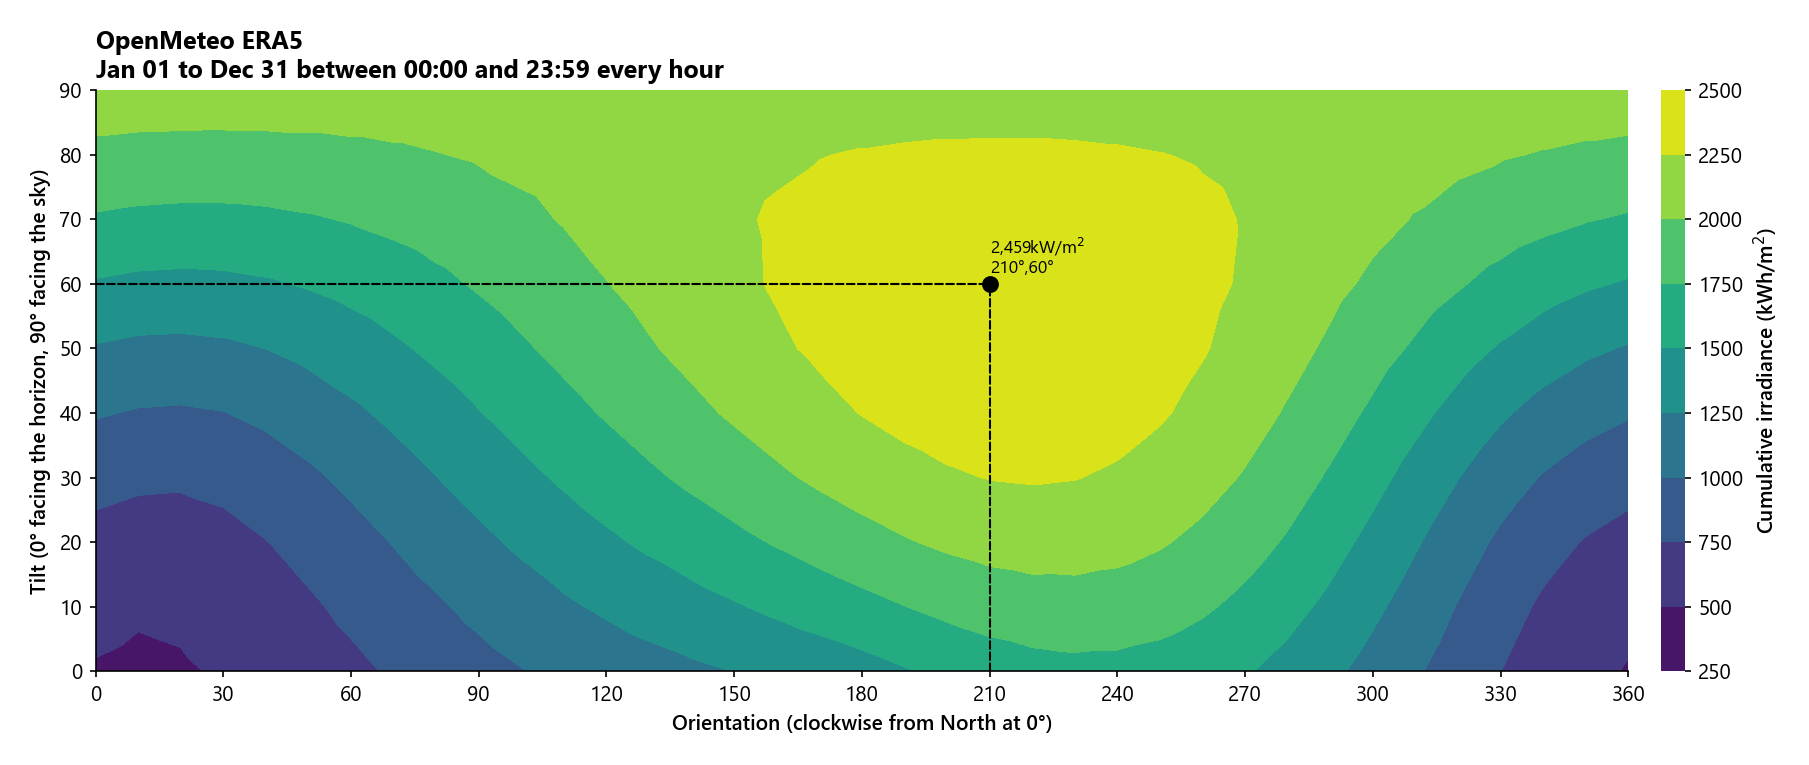

In [228]:
soll.plot_tilt_orientation_factor()

In [ ]:
from kvrrj.solar import Solar, Location




ValueError: All arrays must be the same length. Lengths are {'datetimes': 8760, 'direct_normal_irradiance': 8760, 'diffuse_horizontal_irradiance': 8760, 'global_horizontal_irradiance': 45}.

In [ ]:
# from kvrrj.ladybug.analysis_period import to_lb_datetime, lbdatetime
# lbdatetime(1, 1, 0, 0, leap_year=True).year
from ladybug.dt import DateTime as lbdatetime
from ladybug.analysisperiod import AnalysisPeriod
import pandas as pd
from kvrrj.ladybug.analysisperiod import (
    # analysis_period_to_datetimes,
    timedelta,
    to_lb_analysis_period,
)

datetimes = pd.date_range(start="2017-01-01 00:00:00", periods=8760, freq="h").values
# result = to_lb_analysis_period(datetimes)
[pd.Timestamp(i) for i in np.array(datetimes)]

pd.date_range(start="2017-01-01 00:00:00", periods=8760, freq="h").ndim



1

In [126]:
[i.to_pydatetime() for i in (
    pd.date_range("2017-01-01 00:00:00", periods=24 * 3, freq="h")[
        pd.date_range("2017-01-01 00:00:00", periods=24 * 3, freq="h").hour.isin(
            [22, 23, 0, 1]
        )
    ]
).tolist()]


[datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2017, 1, 1, 1, 0),
 datetime.datetime(2017, 1, 1, 22, 0),
 datetime.datetime(2017, 1, 1, 23, 0),
 datetime.datetime(2017, 1, 2, 0, 0),
 datetime.datetime(2017, 1, 2, 1, 0),
 datetime.datetime(2017, 1, 2, 22, 0),
 datetime.datetime(2017, 1, 2, 23, 0),
 datetime.datetime(2017, 1, 3, 0, 0),
 datetime.datetime(2017, 1, 3, 1, 0),
 datetime.datetime(2017, 1, 3, 22, 0),
 datetime.datetime(2017, 1, 3, 23, 0)]

In [ ]:
from kvrrj.ladybug.analysisperiod import analysis_period_to_datetimes

from kvrrj.ladybug.analysisperiod import to_lb_datetime, lbdatetime, AnalysisPeriod
import pandas as pd
import numpy as np


args = [
    lbdatetime(1, 1, 0, 0, 0),
    "2020-01-01 00:00:00+00:00",
    {"month": 1, "day": 1, "hour": 0, "minute": 0, "second": 0, "leap_year": False},
    pd.to_datetime("2020-01-01 00:00:00+00:00"),
    pd.to_datetime("2020-01-01 00:00:00+00:00").to_datetime64(),
    datetime(2020, 1, 1, 0, 0, 0),
    pd.date_range("2020-01-01 00:00:00+00:00", periods=1),
    AnalysisPeriod(),
    [
        lbdatetime(1, 1, 0, 0, 0),
    ],
    np.array(
        [[
            "2020-01-01 00:00:00+00:00",
            pd.to_datetime("2020-01-01 00:00:00+00:00"),
            datetime(2020, 1, 1, 0, 0, 0),
        ],
        [
            "2020-01-01 00:00:00+00:00",
            pd.to_datetime("2020-01-01 00:00:00+00:00"),
            datetime(2020, 1, 1, 0, 0, 0),
        ],]
    ),
]
for arg in args:
    print(type(arg), to_lb_datetime(arg))



<class 'ladybug.dt.DateTime'> 01 Jan 00:00
<class 'str'> 01 Jan 00:00
<class 'dict'> 01 Jan 00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> 01 Jan 00:00
<class 'numpy.datetime64'> 01 Jan 00:00
<class 'datetime.datetime'> 01 Jan 00:00
<class 'pandas.core.indexes.datetimes.DatetimeIndex'> [01 Jan 00:00]
<class 'ladybug.analysisperiod.AnalysisPeriod'> [01 Jan 00:00 01 Jan 01:00 01 Jan 02:00 ... 31 Dec 21:00 31 Dec 22:00
 31 Dec 23:00]
<class 'list'> [01 Jan 00:00]
<class 'numpy.ndarray'> [[01 Jan 00:00 01 Jan 00:00 01 Jan 00:00]
 [01 Jan 00:00 01 Jan 00:00 01 Jan 00:00]]


In [ ]:
from kvrrj.wind import Wind

Wind(
    location=epw.location,
    wind_speeds=epw.wind_speed.values,
    wind_directions=epw.wind_direction.values,
    datetimes=analysis_period_to_datetimes(epw.wind_direction.header.analysis_period),
    height_above_ground=10,
)

: 

In [ ]:
from kvrrj.solar import Solar, AnalysisPeriod, Face3D, Plane, Point3D, RadiationType

sol = Solar.from_epw(epw)

# Solar.from_dict(sol.to_dict()
# Solar.from_json(sol.to_json())
# Solar.from_dataframe(sol.to_dataframe())
# Solar.from_average([sol, sol, sol], weights=[1, 2, 3])

# smx = sol.to_lb_sky_matrix(temperature=epw.dry_bulb_temperature)
# smx

# sol.to_lb_radiation_study(north=34).radiation_values

# sol.plot_tof(levels=101, cmap="YlOrRd", quantiles=[0.25])

# sol.lb_suns

# sol.sunrise_sunset()

f = Face3D.from_regular_polygon(
    side_count=4, radius=3, base_plane=Plane(o=Point3D(0, -3, 2))
)
sol.plot_tilt_orientation_factor(
    altitude_count=10, azimuth_count=36, shade_objects=[], levels=101, cmap="YlOrRd", quantiles=[0.25, 0.5, 0.75]
)


In [ ]:
# sol.directional_irradiance(as_dataframe=True).plot()

# sol.radiation_benefit(temperature=epw.dry_bulb_temperature).resample("12h").mean().plot()

# sol.tilt_orientation_irradiance(10, 5)

# _, ax = plt.subplots(subplot_kw={"projection": "polar"})
# sol.plot_radrose(ax=ax, tilt_angle=0.9, analysis_period=AnalysisPeriod(st_hour=13, end_hour=17))

f = Face3D.from_regular_polygon(side_count=4, radius=12, base_plane=Plane(o=Point3D(0, 0, 2)))
sol.plot_tilt_orientation_factor(altitude_count=10, azimuth_count=36, shade_objects=[], levels=101, cmap="YlOrRd")



In [ ]:

df

In [ ]:
# tof calc

from kvrrj.solar import RadiationDome


In [ ]:
from kvrrj.geometry.util import vector3d_to_azimuth_altitude

# create a radiation dome
rd = RadiationDome(sol.to_lb_sky_matrix(), azimuth_count=36, altitude_count=9)

# create a list of azimuths
unique_azimuths = np.linspace(0, 360, rd.azimuth_count, endpoint=False)

# get the raw data
azimuths, altitudes = np.array([vector3d_to_azimuth_altitude(i) for i in rd.direction_vectors]).T
values = np.array(rd.total_values)

# find the index of the value where altitude is 90
idx = np.where(altitudes==90)[0]
# get the altitude and value at 90 degrees
altitude_90 = altitudes[idx]
value_90 = values[idx]
# remove the 90 degree values from each list
azimuths = np.delete(azimuths, idx)
values = np.delete(values, idx)
altitudes = np.delete(altitudes, idx)
# create a new list of values at 90 for each azimuth
azimuths = np.concatenate(
    (
        azimuths,
        np.linspace(0, 360, rd.azimuth_count, endpoint=False),
    )
)
altitudes = np.concatenate(
    (
        altitudes,
        np.repeat(90, rd.azimuth_count),
    )
)
values = np.concatenate(
    (
        values,
        np.repeat(value_90, rd.azimuth_count),
    )
)

# plot usiny pcolor
plt.figure(figsize=(8, 8))
plt.tricontourf(azimuths, altitudes, values, levels=20)

# # (altitudes == 0).sum()
# # get the value at 90 altitude
# a


In [ ]:
import scipy
from kvrrj.wind import Wind
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from collections import defaultdict

self = Wind.from_epw(epw).filter_by_speed(min_speed=0.1)
self.plot_windrose(directions=36, other_bins=[0, 5, 10, 15, 20])

In [ ]:
import calendar
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.axes import Axes

from kvrrj.geometry.util import angle_to_vector
from kvrrj.viz.color import contrasting_color

ax: Axes = None
show_values: bool = True
show_arrows: bool = True
other_data: list[float] = [10] * len(self)
kwargs = {}

"""Create a plot showing the annual wind speed and direction bins
using the month_time_average method.

Args:
    ax (plt.Axes, optional):
        The axes to plot on. If None, the current axes will be used.
    show_values (bool, optional):
        Whether to show values in the cells. Defaults to False.
    show_arrows (bool, optional):
        Whether to show the directional arrows on each patch.
    other_data: (pd.Series, optional):
        The other data to align with the wind direction and speed.
        Defaults to None which uses wind speed.
    **kwargs:
        Additional keyword arguments to pass to the pcolor function.
        title (str, optional):
            A title for the plot. Defaults to None.

Returns:
    plt.Axes:
        A matplotlib Axes object.

"""

if ax is None:
    ax = plt.gca()

if other_data is None:
    other_data = self.wind_speeds
    kwargs["vmin"] = kwargs.get("vmin", 0)
    kwargs["unit"] = kwargs.get("unit", "m/s")


ax.set_title(self.source)

df = self.wind_matrix(other_data=other_data)
_wind_directions = df["direction"]
_other_data = df["other"]

cmap = kwargs.pop("cmap", "YlGnBu")
vmin = kwargs.pop("vmin", _other_data.values.min())
vmax = kwargs.pop("vmax", _other_data.values.max())
unit = kwargs.pop("unit", "")
cbar_title = kwargs.pop("cbar_title", None)
norm = kwargs.pop("norm", plt.Normalize(vmin=vmin, vmax=vmax, clip=True))
mapper = kwargs.pop("mapper", ScalarMappable(norm=norm, cmap=cmap))
pc = ax.pcolor(_other_data, cmap=cmap, vmin=vmin, vmax=vmax, **kwargs)

if show_arrows:
    _x, _y = np.array(angle_to_vector(_wind_directions.values))
    arrow_scale = 0.8
    ax.quiver(
        np.arange(1, 13, 1) - 0.5,
        np.arange(0, 24, 1) + 0.5,
        (_x * _other_data.values / 2) * arrow_scale,
        (_y * _other_data.values / 2) * arrow_scale,
        pivot="mid",
        fc="white",
        ec="black",
        lw=0.5,
        alpha=0.5,
    )

if show_values:
    for _xx, col in enumerate(_wind_directions.values.T):
        for _yy, wind_dir_value in enumerate(col.T):
            local_value = _other_data.values[_yy, _xx]
            cell_color = mapper.to_rgba(local_value)
            text_color = contrasting_color(cell_color)
            # direction text
            ax.text(
                _xx,
                _yy,
                f"{_wind_directions.values[_yy][_xx]:0.0f}°",
                color=text_color,
                ha="left",
                va="bottom",
                fontsize="xx-small",
            )
            # other_data text
            ax.text(
                _xx + 1,
                _yy + 1,
                f"{_other_data.values[_yy][_xx]:0.1f}{unit}",
                color=text_color,
                ha="right",
                va="top",
                fontsize="xx-small",
            )

# add colorbar
ax.set_xticks([i  - 0.5 for i in range(1, 13, 1)])
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13, 1)])
ax.set_yticks([i + 0.5 for i in range(24)])
ax.set_yticklabels([f"{i:02d}:00" for i in range(24)])
for label in ax.yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

cb = plt.colorbar(pc, label=cbar_title, pad=0.01)
cb.outline.set_visible(False)

In [ ]:

    ax.set_xticks(np.arange(1, 13, 1) - 0.5)
    ax.set_xticklabels([calendar.month_abbr[i] for i in np.arange(1, 13, 1)])
    ax.set_yticks(np.arange(0, 24, 1) + 0.5)
    ax.set_yticklabels([f"{i:02d}:00" for i in np.arange(0, 24, 1)])
    for label in ax.yaxis.get_ticklabels()[1::2]:
        label.set_visible(False)

    cb = plt.colorbar(pc, label=cbar_title, pad=0.01)
    cb.outline.set_visible(False)

    # return ax